# Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
#plt.style.use('seaborn-poster')

In [2]:
theta = np.arange(0,4*(math.pi),math.pi/1000)

In [3]:
amplitude1 = np.sin(theta)
amplitude2 = np.cos(theta)

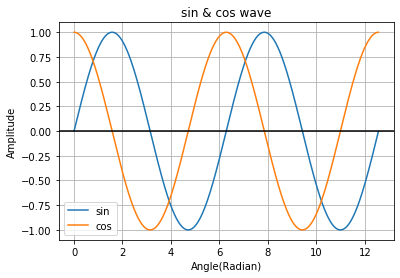

In [4]:
#plt.style.use('seaborn-poster')
plt.plot(theta,amplitude1, label ="sin")
plt.plot(theta,amplitude2, label ="cos")
plt.title("sin & cos wave")
plt.xlabel("Angle(Radian)")
plt.ylabel("Amplitude")
plt.grid(True,which ='both')
plt.axhline(y = 0, color = 'k')
plt.legend()

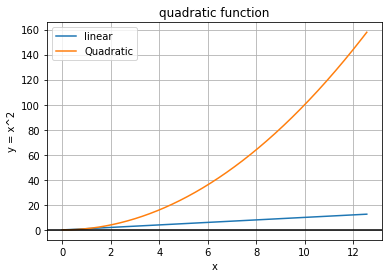

In [5]:
amplitude3 = theta*theta
amplitude4 = theta
plt.plot(amplitude4,amplitude4, label='linear')
plt.plot(theta,amplitude3,label='Quadratic')
plt.title("quadratic function")
plt.xlabel("x")
plt.ylabel("y = x^2")
plt.grid(True,which ='both')
plt.axhline(y = 0, color = 'k')
plt.legend()

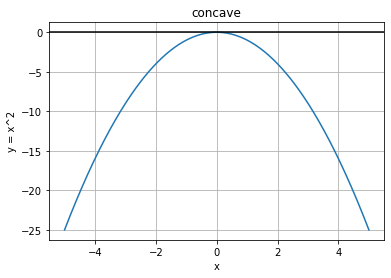

In [6]:
x2 = np.linspace(-5,5,10000)
y2 = -(x2 * x2)
plt.plot(x2,y2)
plt.title("concave")
plt.xlabel("x")
plt.ylabel("y = x^2")
plt.grid(True,which ='both')
plt.axhline(y = 0, color = 'k')

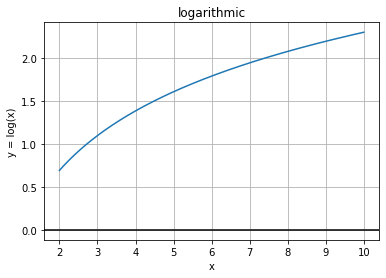

In [7]:
x1= np.linspace(2,10,10000)
y1 = np.log(x1)
plt.plot(x1,y1)
plt.title("logarithmic")
plt.xlabel("x")
plt.ylabel("y = log(x)")
plt.grid(True,which ='both')
plt.axhline(y = 0, color = 'k')


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>



# sine wave, chirp (linear, quadratic, logarithmic)

In [8]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np

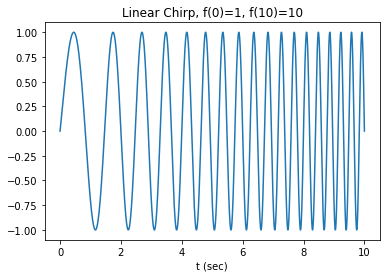

In [9]:
t = np.linspace(0, 10, 5001)
w = chirp(t, f0=0.5, f1=3, t1=10, method='linear',phi=-90)
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=1, f(10)=10")
plt.xlabel('t (sec)')
plt.show()

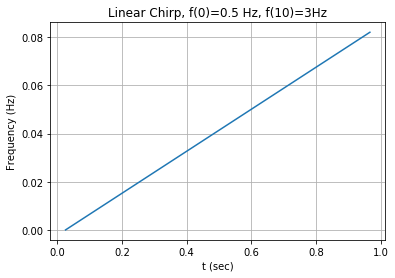

In [10]:
ff, tt, Sxx = spectrogram(w)
tt = tt/5001
plt.plot(tt, ff[:22])
plt.title('Linear Chirp, f(0)=0.5 Hz, f(10)=3Hz')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

In [11]:
fs = 3000
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)

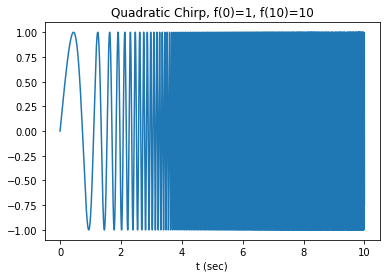

In [12]:
w = chirp(t, f0=0.5, f1=100, t1=10, method='quadratic',phi=-90)
plt.plot(t,w)
plt.title("Quadratic Chirp, f(0)=1, f(10)=10")
plt.xlabel('t (sec)')
plt.show()

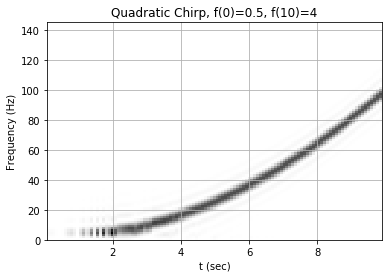

In [13]:
ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.figure()
plt.pcolormesh(tt, ff[:100], Sxx[:100], cmap='gray_r')
plt.title('Quadratic Chirp, f(0)=0.5, f(10)=4')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

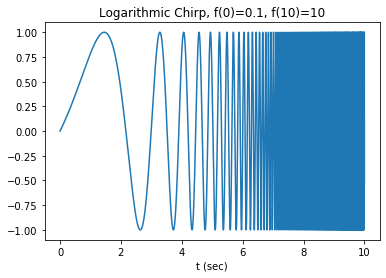

In [14]:
w = chirp(t, f0=0.1, f1=100, t1=10, method='logarithmic',phi = -90)
plt.plot(t,w)
plt.title("Logarithmic Chirp, f(0)=0.1, f(10)=10")
plt.xlabel('t (sec)')
plt.show()

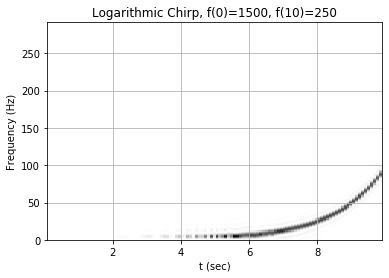

In [15]:
ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.pcolormesh(tt, ff[:200], Sxx[:200], cmap='gray_r')
plt.title('Logarithmic Chirp, f(0)=1500, f(10)=250')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

# sin wave with different frequencies

In [16]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [17]:
sin_sig1 = thinkdsp.SinSignal(freq=20, amp=0.5, offset=0)
sin_sig2 = thinkdsp.SinSignal(freq=40, amp=0.5, offset=0)
sin_sig3 = thinkdsp.SinSignal(freq=80, amp=0.5, offset=0)
sin_sig4 = thinkdsp.SinSignal(freq=160, amp=0.5, offset=0)
sin_sig5 = thinkdsp.SinSignal(freq=2000, amp=0.5, offset=0)
mix = sin_sig1+ sin_sig2+ sin_sig3+ sin_sig4 + sin_sig5 

Text(0.5, 0, 'Time (s)')

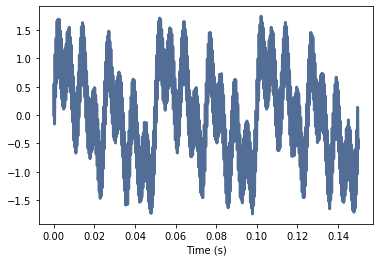

In [18]:
plt.close('all')
mix.plot()
plt.xlabel('Time (s)')
#plt.style.use('seaborn-poster')

In [19]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [20]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio
##print('Number of samples', len(wave.ys))
#print('Timestep in ms', 1 / wave.framerate * 1000)

# Frequency spectrum

C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


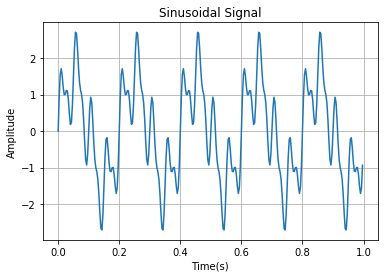

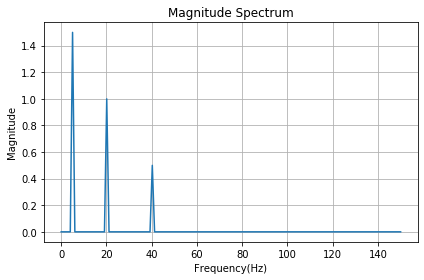

In [21]:

import matplotlib.pyplot as plt
from scipy.fftpack import fft
import numpy as np
from math import pi


# Generate sine wave
Fs = 300
t = np.arange(0,1,1/Fs)
f = 20

x = np.sin(2*pi*f*t)+0.5*np.sin(2*pi*40*t)+ 1.5*np.sin(2*pi*5*t)

plt.figure(1)
plt.plot(t,x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid('on')

# generate frequency axis
n = np.size(t)
fr = (Fs/2)*np.linspace(0,1,n/2)
# Compute FFT 
X = fft(x)
X_m = (2/n)*abs(X[0:np.size(fr)])
plt.figure(2)
plt.plot(fr,X_m)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.grid('on')


# Nyquist sampling theorem
A bandlimited continuous-time signal can be sampled and perfectly reconstructed from its samples if the waveform is sampled over twice as fast as it's highest frequency component.

\begin{align}
f_{max} < f_s/2
\end{align}

# Time-Frequency decomposition


In [22]:
from scipy import signal
import matplotlib.pyplot as plt

In [23]:
fs = 10000
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
noise *= np.exp(-time/5)
r = carrier + noise

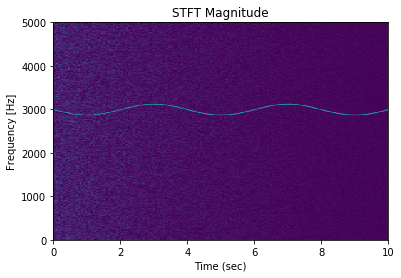

In [24]:
f, t, Zxx = signal.stft(r, fs, nperseg=1000)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel("Time (sec)")
plt.show()

# Butter-worth filter design


In [25]:
from IPython.display import display, Image

## 3rd order bandpass filter (1-100 )Hz

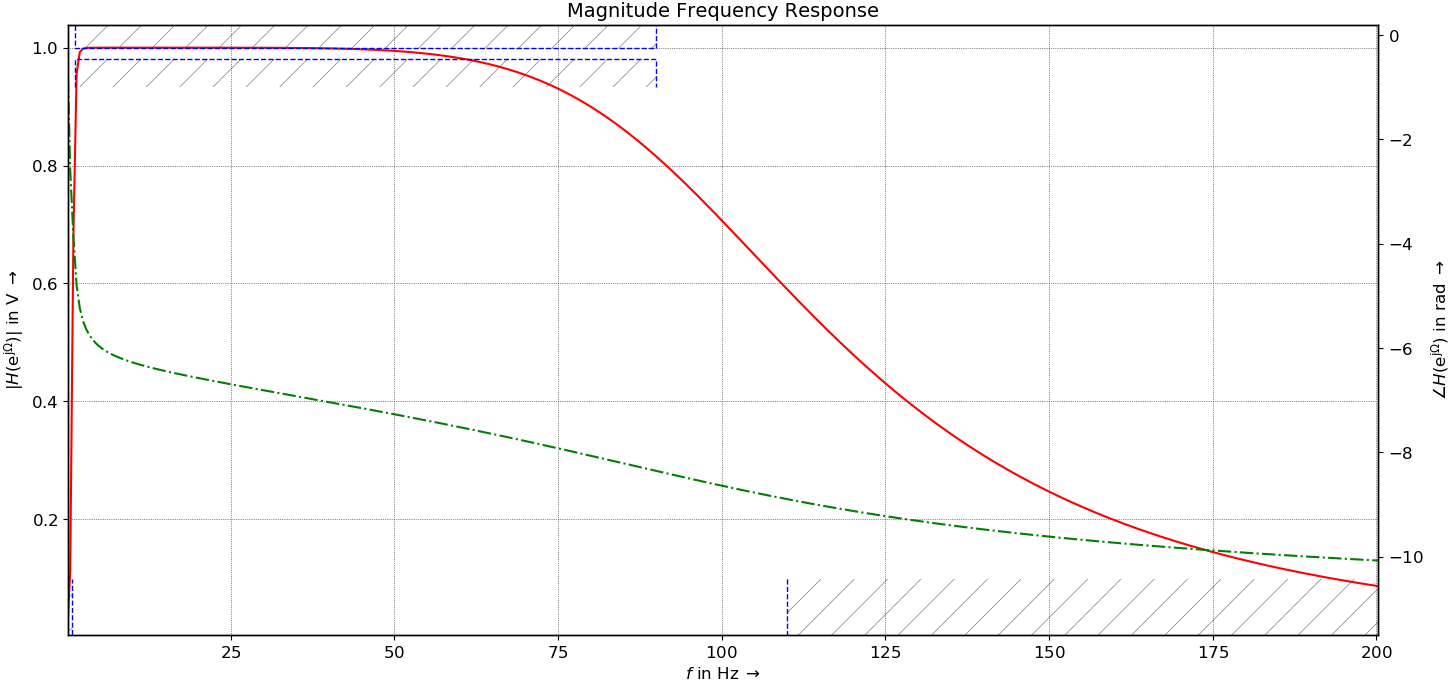

In [26]:
display(Image(filename="bpf_iir_n3_.png" ))

## 5th order bandpass filter (1-100 )Hz

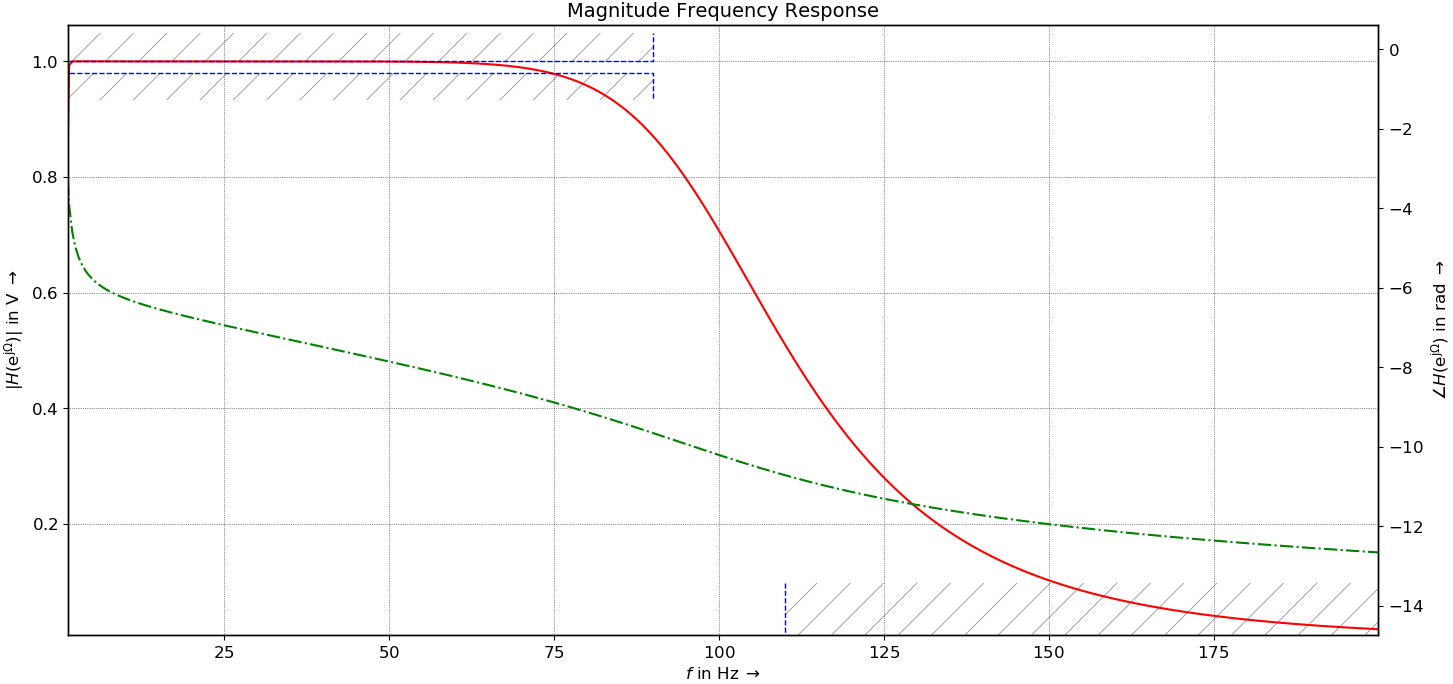

In [27]:
display(Image(filename="bpf_iir_n5_.png" ))

## 8th order bandpass filter (1-100 )Hz

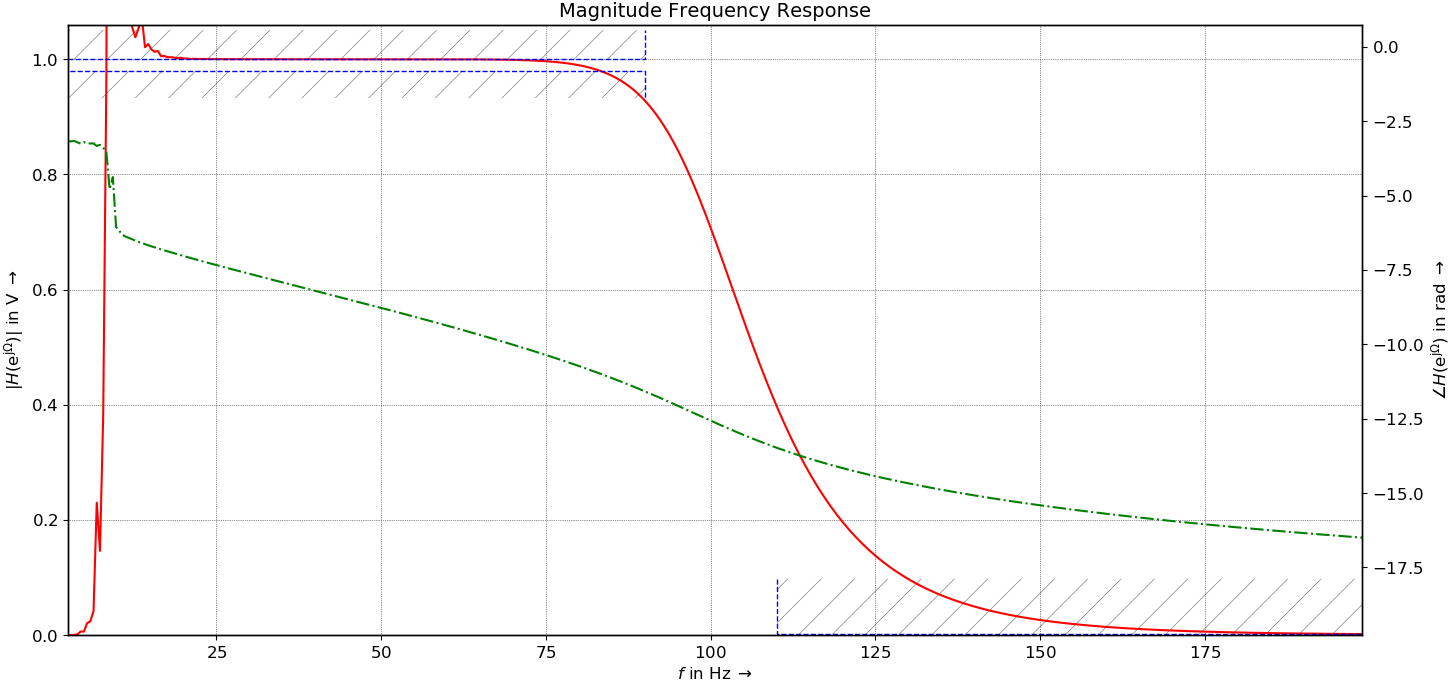

In [28]:
display(Image(filename="bpf_iir_n8_.png" ))

# 3rd order band-stop filter (45-55 Hz)

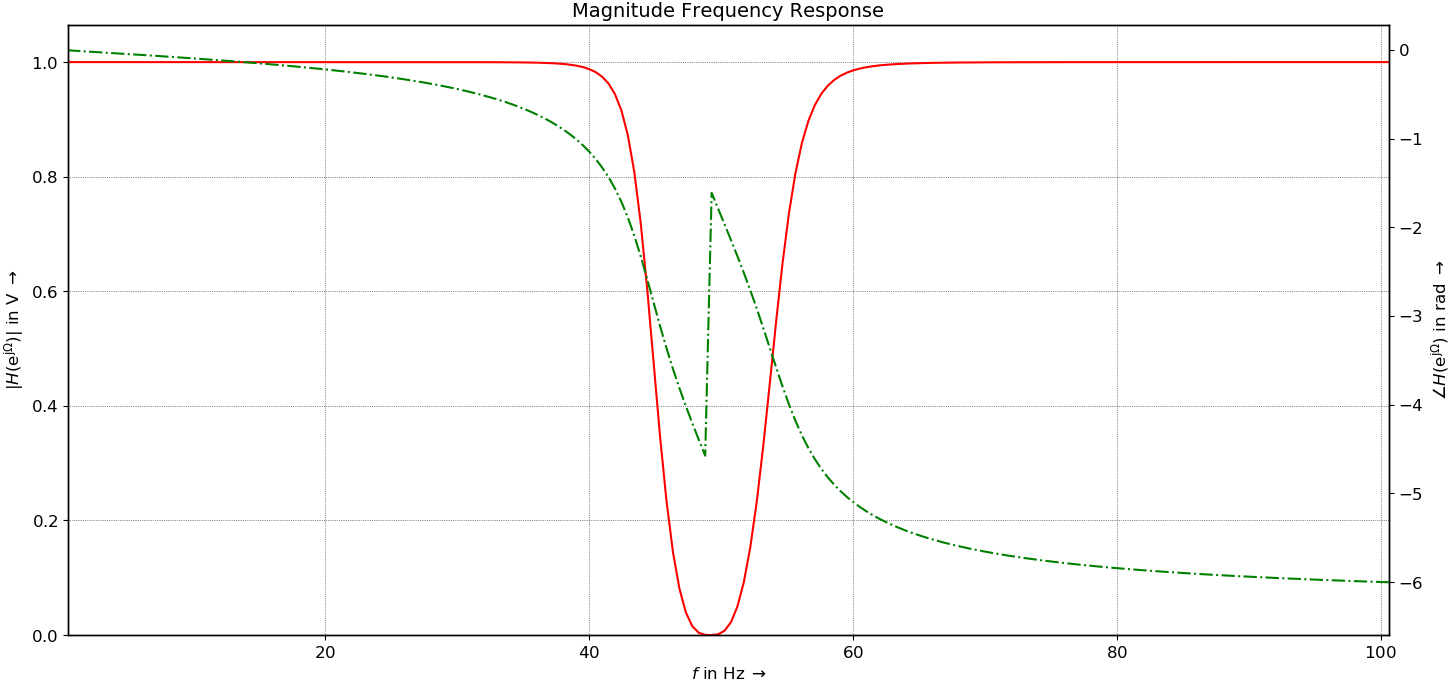

In [29]:
display(Image(filename="bsf_iir_n3_.png" ))

# 5th order band-stop filter (45-55 Hz)

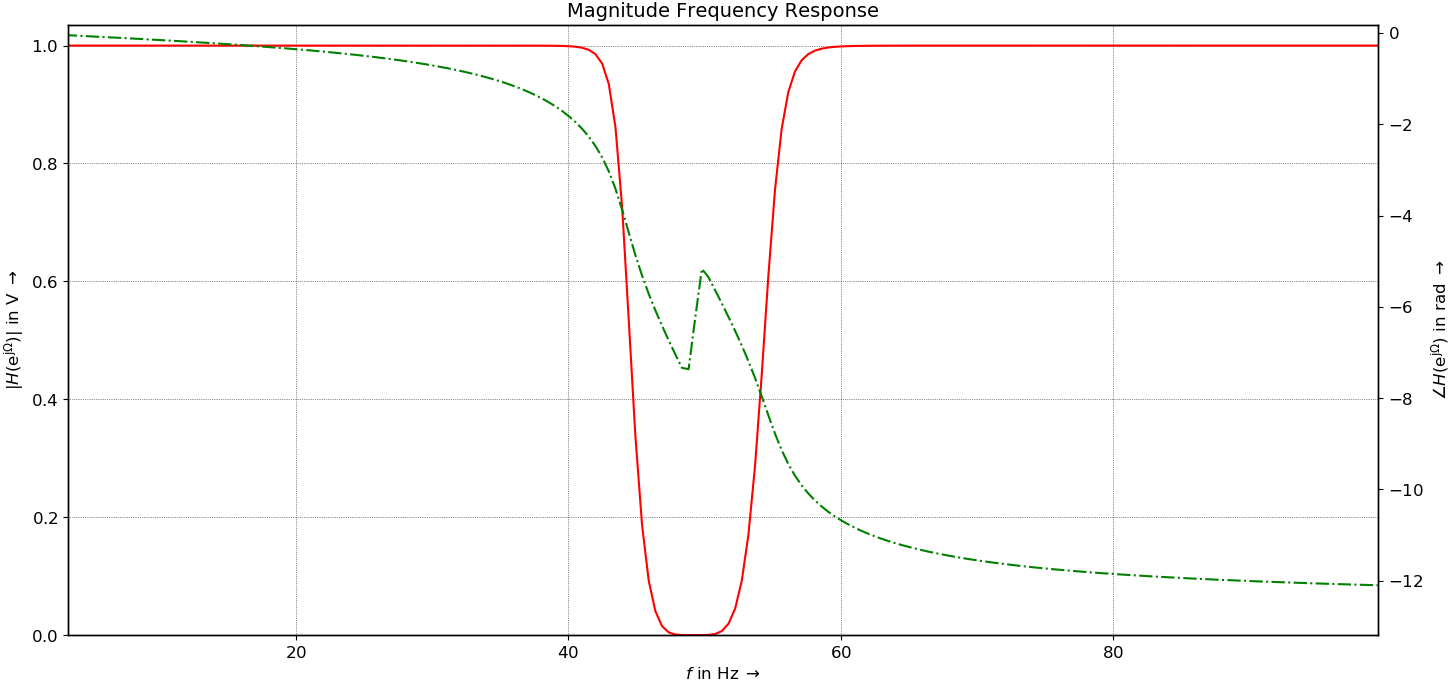

In [30]:
display(Image(filename="bsf_iir_n5_.png" ))

# 6th order band-stop filter (45-55 Hz)

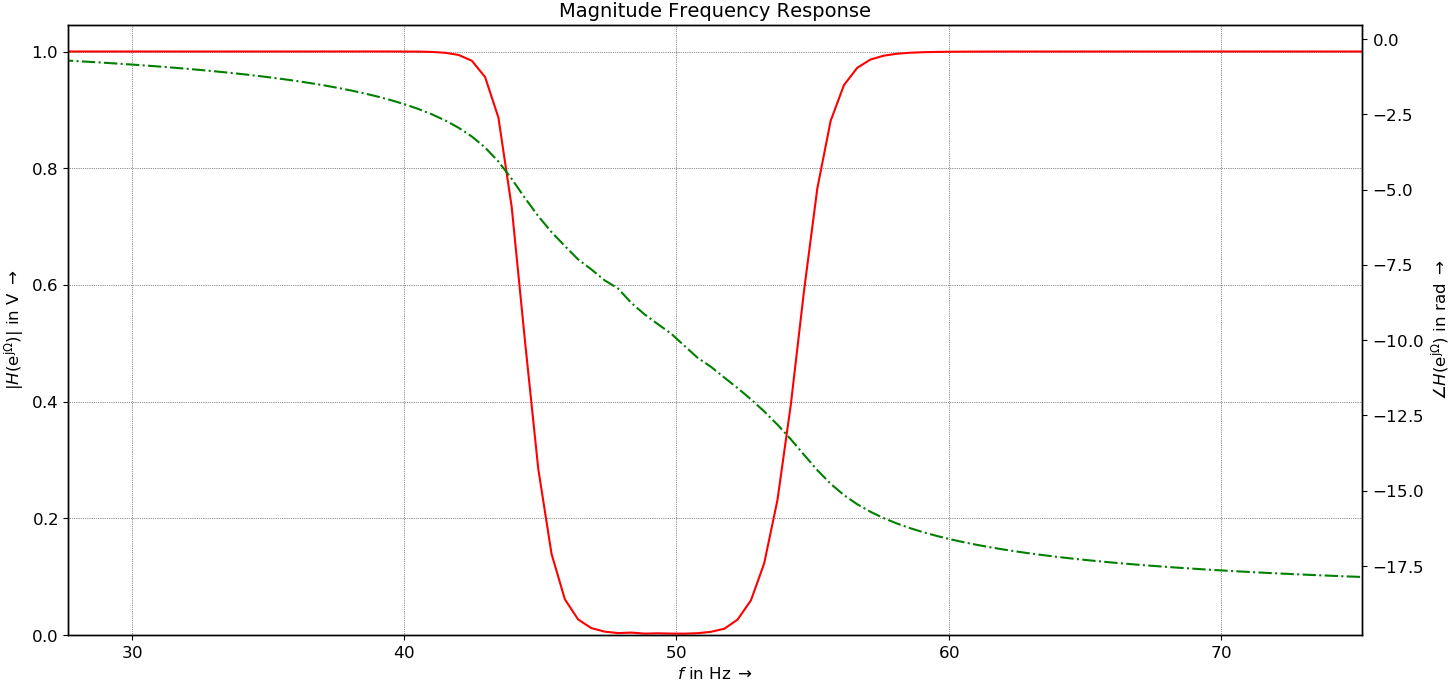

In [31]:
display(Image(filename="bsf_iir_n6_.png" ))

# 5th order lowpass filter f_c = 100 Hz

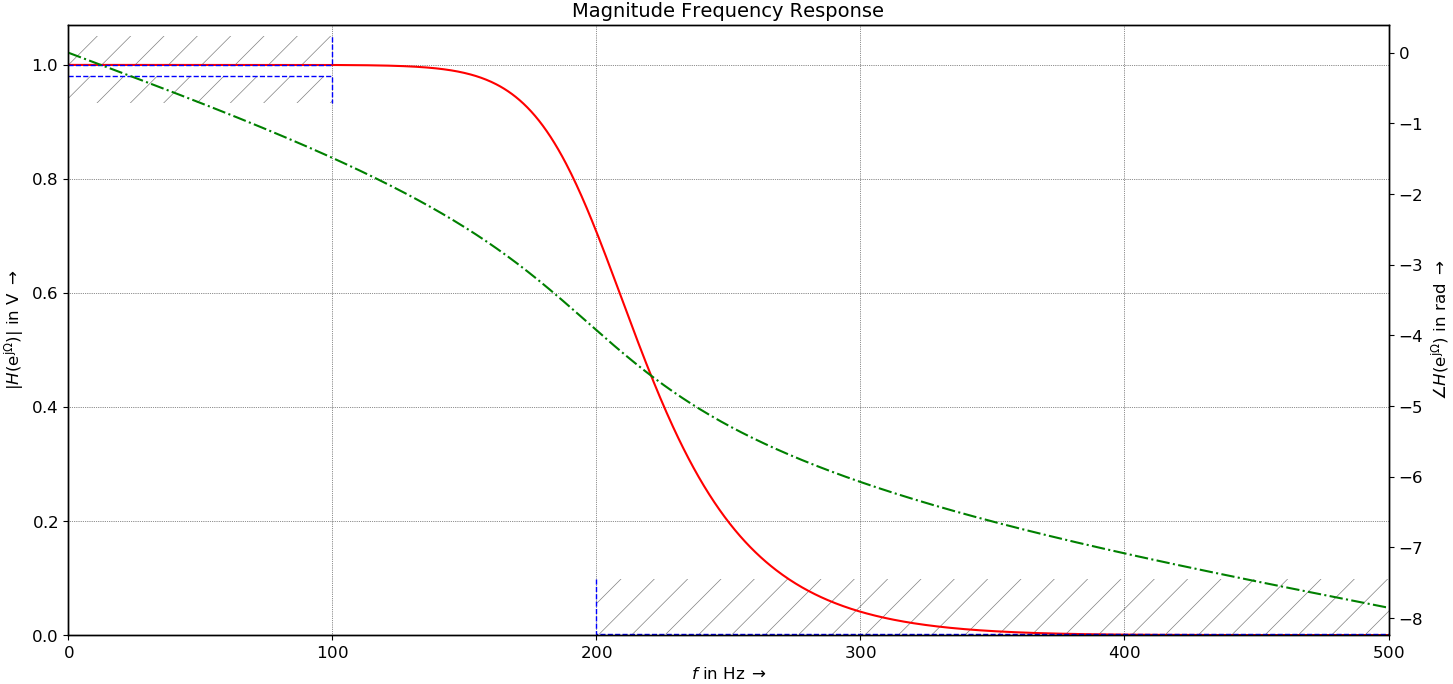

In [32]:
display(Image(filename="lpf_iir_n5_.png" ))

# 15th order lowpass filter f_c = 100 Hz

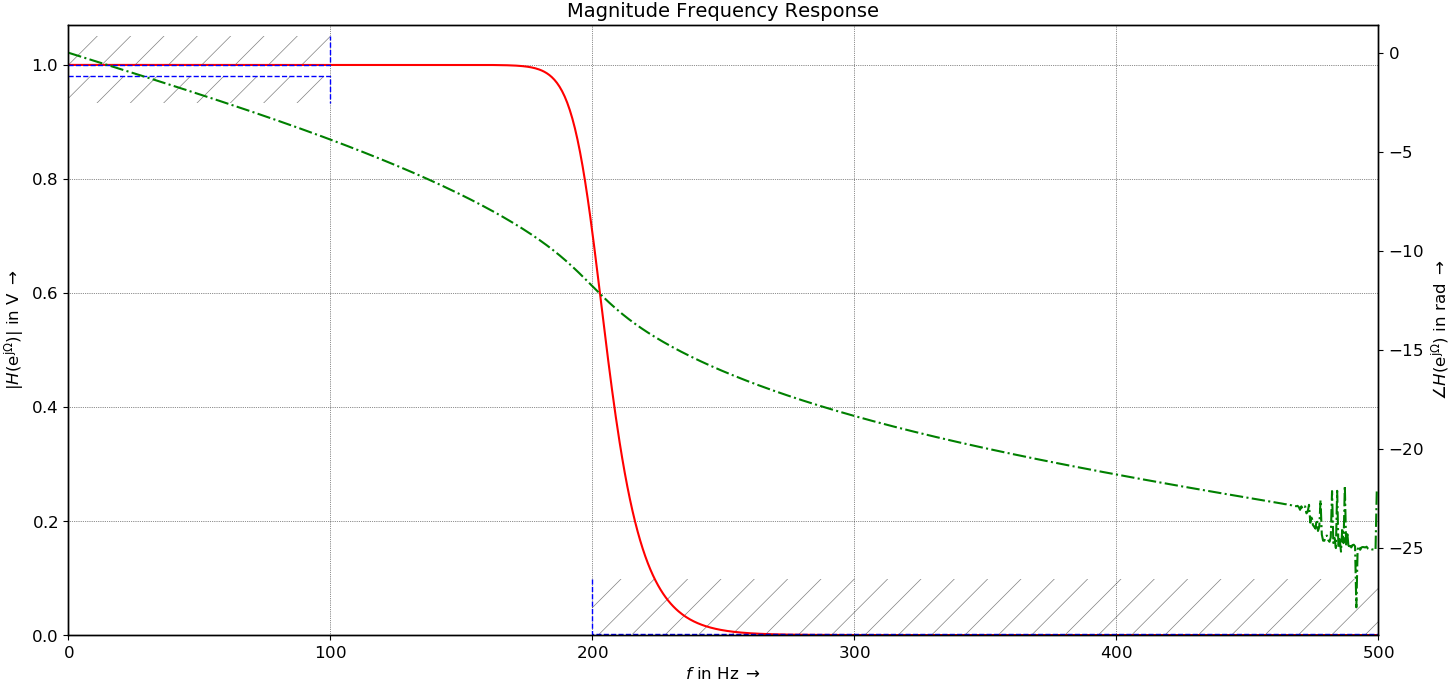

In [33]:
display(Image(filename="lpf_iir_n15_.png" ))

# 25th order lowpass filter f_c = 100Hz

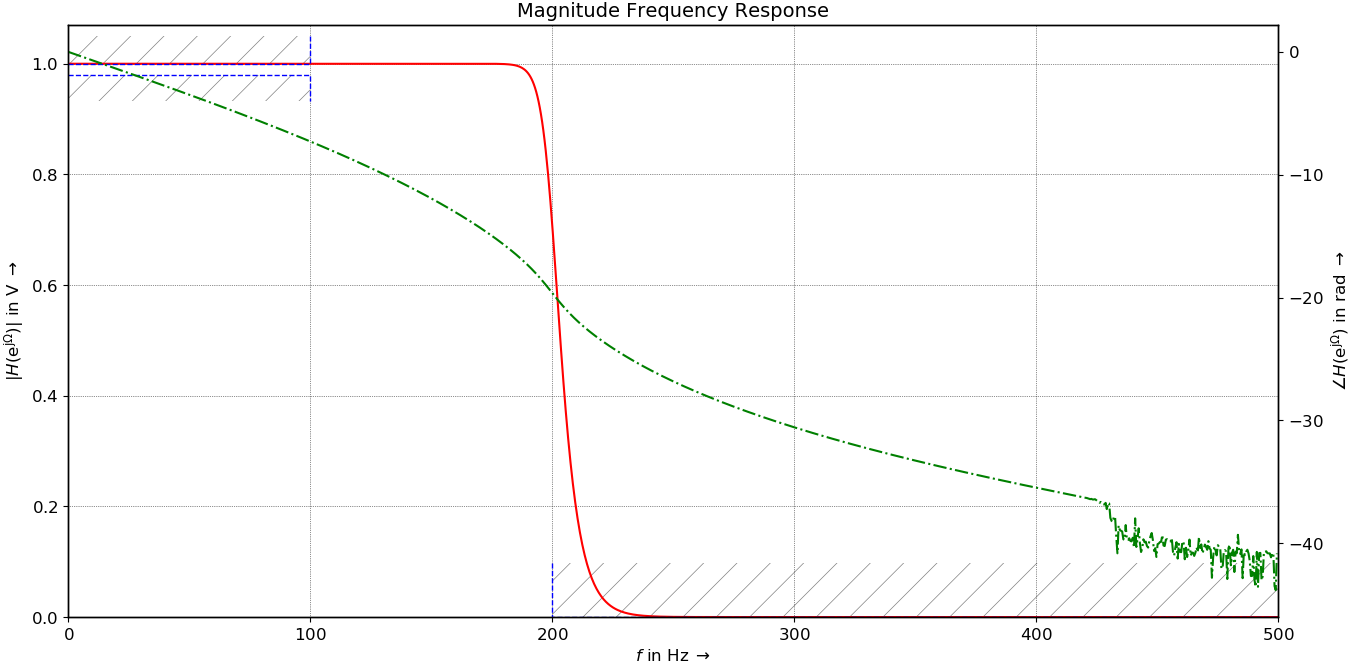

In [34]:
display(Image(filename="lpf_iir_n25.png" ))

# 1st order highpass filter f_c = 1 Hz

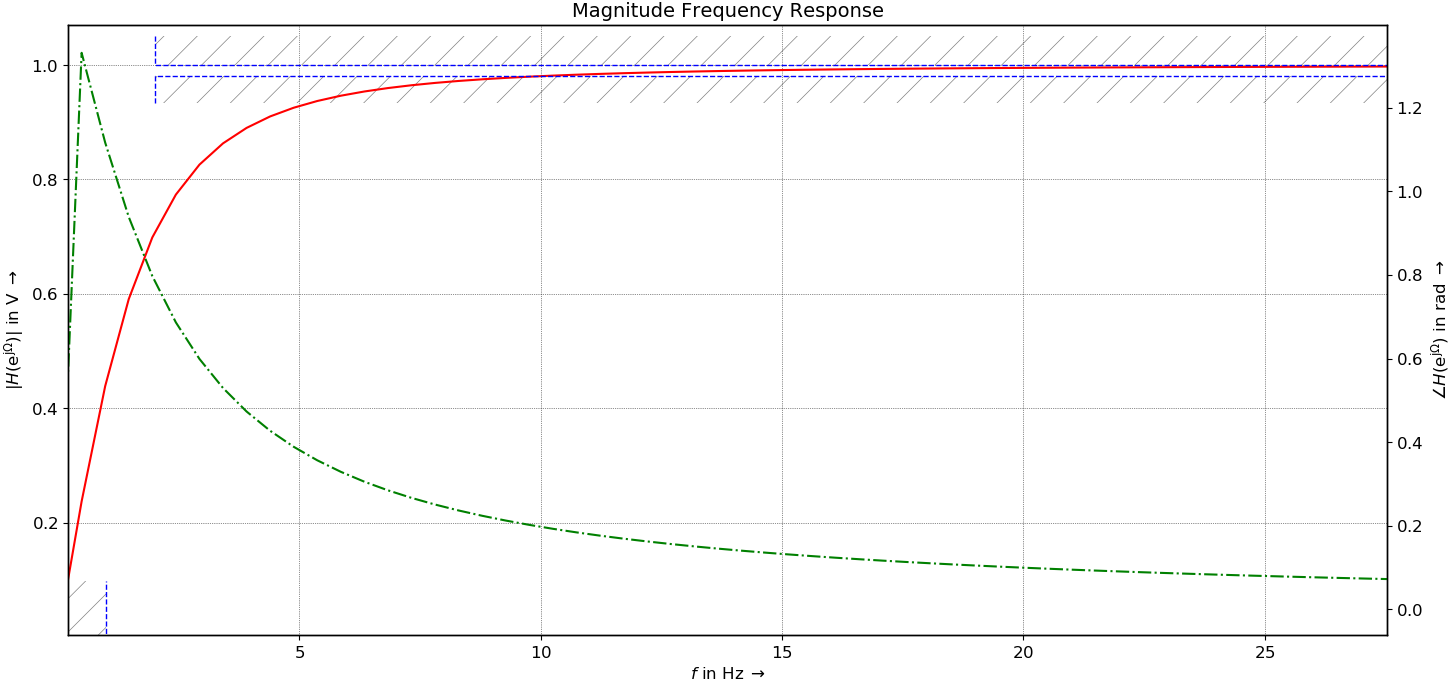

In [35]:
display(Image(filename="hpf_iir_n1_.png" ))

# 3rd order highpass filter f_c = 1Hz

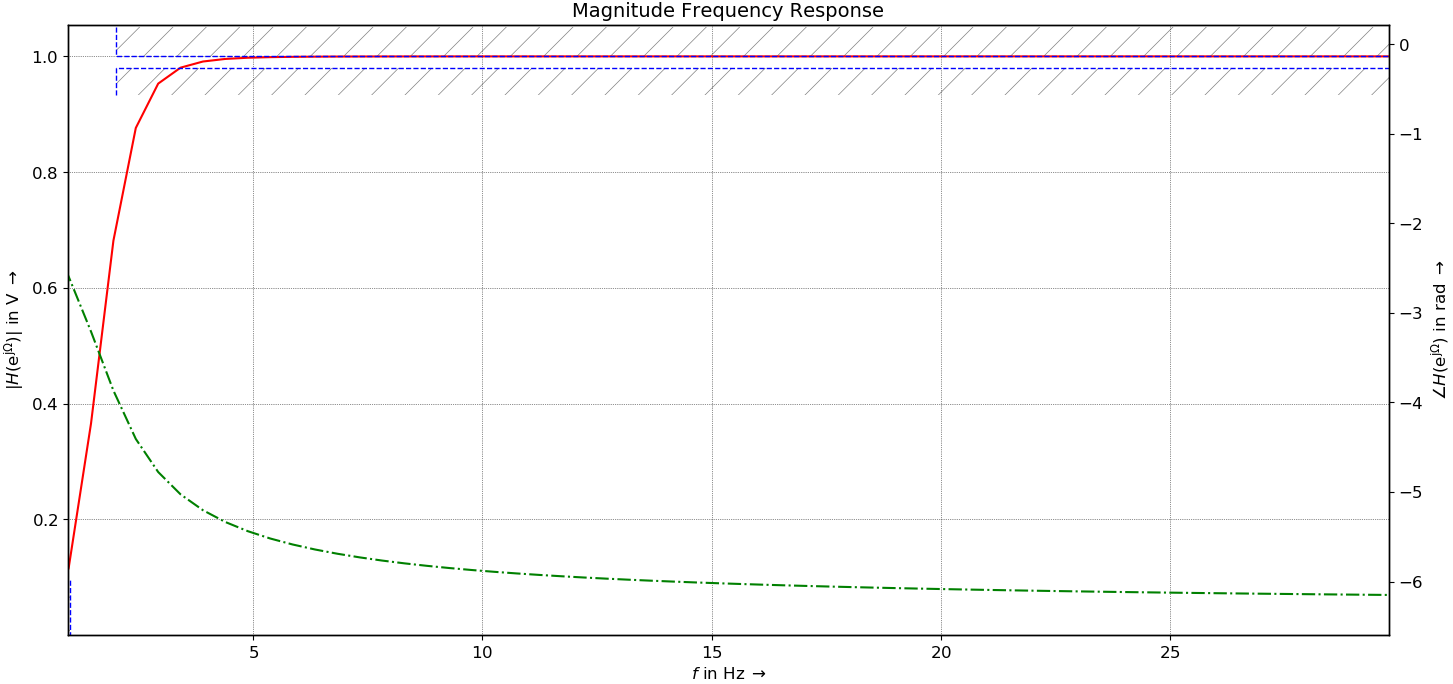

In [36]:
display(Image(filename="hpf_iir_n3_.png" ))

# 5th order highpass filter f_c = 1Hz

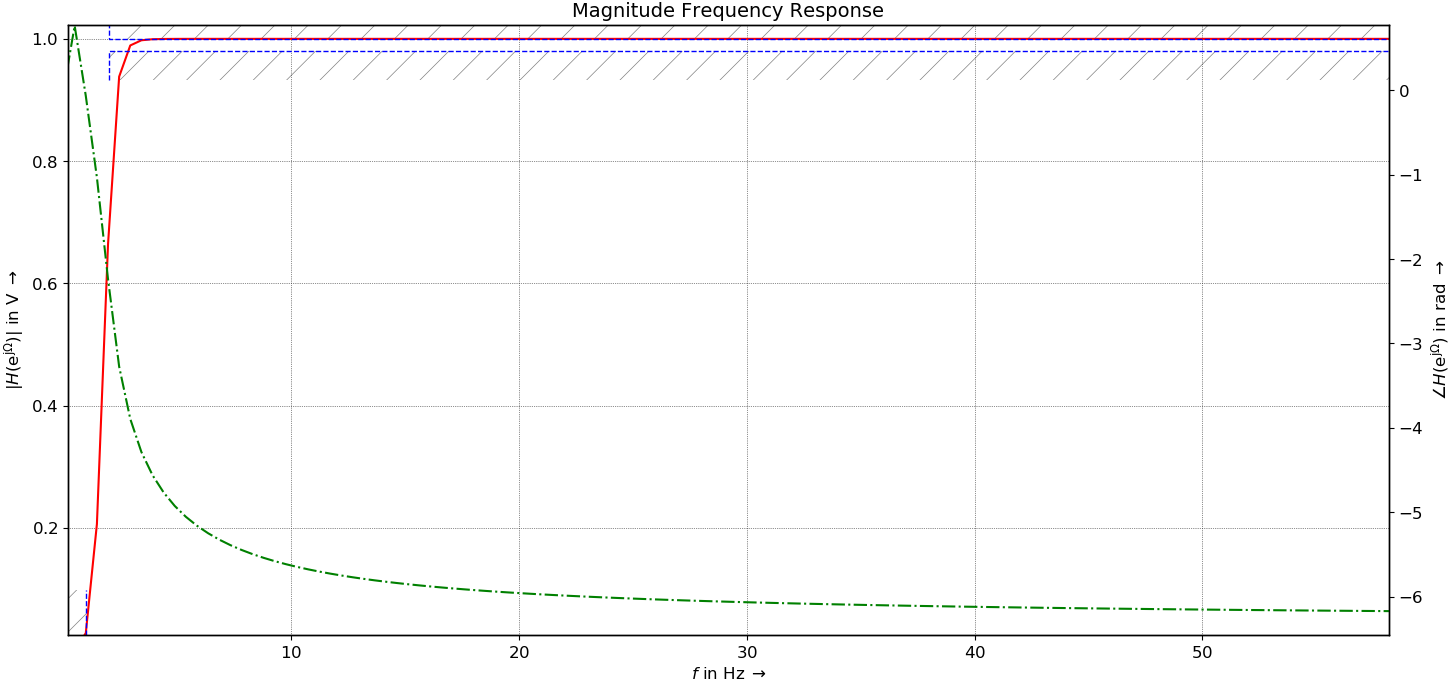

In [37]:
display(Image(filename="hpf_iir_n5_.png" ))

Roll-off is the steepness of a transfer function with frequency, the roll-off rate will increase with increase in the order of filter.